<h2>Compare Lexington Property Taxes with Peers</h2>

Before and after residential exemption



Autosaving every 30 seconds
0.23.4
0.1 15.64
0.15 16.4
0.2 17.25
0.3 19.24
<class 'pandas.core.frame.DataFrame'>
Float64Index: 4 entries, 0.1 to 0.3
Data columns (total 2 columns):
NewRate            4 non-null float64
ExemptionAmount    4 non-null float64
dtypes: float64(2)
memory usage: 96.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Lexington to Lexington Nonoo (30% RE)
Data columns (total 5 columns):
ResRate                 24 non-null float64
ResExemption            24 non-null float64
Population              24 non-null int64
AvgSingleFamilyTax      24 non-null int64
AvgSingleFamilyValue    17 non-null float64
dtypes: float64(3), int64(2)
memory usage: 1.1+ KB
None


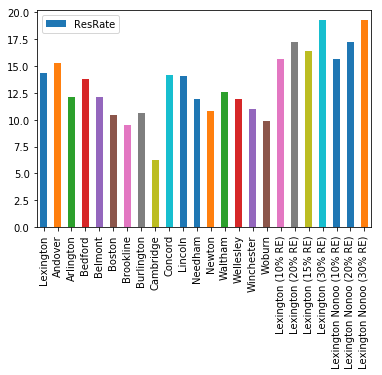

In [38]:
%matplotlib inline
%autosave 30
import matplotlib.pyplot as plt
import pandas as pd
print(pd.__version__)


# Waltham: resexempt needs to be added
# 12.61 plus resexempt

#Andover
#Reading
#North Reading
#Westwood
#Concord
#Acton
#Westford
#Chelmsford

#urban alternatives
# Brookline
# Boston
# Somerville
# Cambridge


# lexington scenarios:

res_value = 9952138700
res_exempt_parcels = 9265
avg_res_parcel = 918772
orig_rate = 14.3

adjustments = {}
nonoo = {}
for resexempt in [0.1, 0.15, 0.2, 0.3]:
    ex_amt = avg_res_parcel*resexempt
    new_tax_rate = round(orig_rate * res_value / (res_value - ex_amt * res_exempt_parcels),2)
    print (f'{resexempt} {new_tax_rate}')
    adjustments[resexempt] = [new_tax_rate,ex_amt]
    nonoo[resexempt] = [new_tax_rate, 0]
    
    

adjdf = pd.DataFrame.from_dict(adjustments, orient='index', columns=['NewRate','ExemptionAmount'])
print(adjdf.info())

# tax bills
# https://dlsgateway.dor.state.ma.us/reports/rdPage.aspx?rdReport=AverageSingleTaxBill.SingleFamTaxBill_Main
# FY2018.
# may need to update for FY19; need to figure out which data we are showing

# population 2017 per google
taxrates = {'Lexington': [14.3,0,33727,14169,990805],
           'Andover':[15.27,0,35937,9591,613261],
           'Arlington':[12.13,0,45510,7957,655985],
           'Bedford':[13.74,0,14197,9265,674276],
           'Belmont':[12.15,0,26458,12196,1003750],
            'Boston':[10.48,254969,685094,3324,0],
            'Brookline':[9.46,246775,59157,14963,0],
           'Burlington':[10.62,0,27176,5071,477504],
            'Cambridge':[6.29,338983,113630,7204,0],
           'Concord':[14.19,0,19237,14494,1014269],
           'Lincoln':[14.03,0,6781,15629,1149169],
           'Needham': [11.88,0,30999,10749,904828],
           'Newton':[10.82,0,88994,11830,1093367],
            'Waltham':[12.61,147791,62442,0,0],
           'Wellesley':[11.95,0,29479,14839,1241758],
           'Winchester': [11.02,0,22838,12590,1032847],
           'Woburn':[9.89,0,39701,4322,437002],
           'Lexington (10% RE)': adjustments[0.1]+[0,0],
           'Lexington (20% RE)' : adjustments[0.2]+[0,0],
           'Lexington (15% RE)' : adjustments[0.15]+[0,0],
           'Lexington (30% RE)' : adjustments[0.3]+[0,0], # adding in placeholder for demographics at end
           'Lexington Nonoo (10% RE)' : nonoo[0.1]+[0,0],
           'Lexington Nonoo (20% RE)' : nonoo[0.2]+[0,0],
           'Lexington Nonoo (30% RE)' : nonoo[0.3]+[0,0]
           }

# cambridge data on single family home here:
#https://www.cambridgema.gov/~/media/Files/financedepartment/propertytaxnewsletters/FY19/finalfy19taxratelettertocouncil.pdf
# cambridge data is for median not average
# so better not to show it
# median FY 18 tax bill; $4942
# median FY 18 assessment: $1,124,700

#
# Boston average from: https://www.boston.gov/sites/default/files/imce-uploads/2018-03/fy2018_facts_figures.pdf
#
# Brookline figure for avg from Boston report
# Cambridge figure for avg tax bill from Boston report with caveat that it is FY1
# Belmont figure matches my figure, but Arlington figure does not
# and the Arlington figure I have does not match the math so replacing $6113 with $7957.
# wellesley, belmont, needham figures were all exactly same in Boston report
#
tdf = pd.DataFrame.from_dict(taxrates, orient='index', columns=['ResRate','ResExemption',
                                                            'Population', 'AvgSingleFamilyTax','AvgSingleFamilyValue'])
print(tdf.info())

tdf.plot.bar(y='ResRate')

In [39]:
# build data sets
town_examples = {}
town_nonoo_examples = {}
for idx, row in tdf.iterrows():
    town = idx
    town_res_rate = row['ResRate']
    town_res_exempt = row['ResExemption']
    values = []
    for i in range(600000,2200000,200000):
        values.append(int(town_res_rate * (i-town_res_exempt) / 1000))
    town_examples[town] = values
    values = []
    for i in range(600000,2200000,200000):
        values.append(int(town_res_rate * (i) / 1000))
    town_nonoo_examples[town] = values

print('raw data on town taxes to plot')
print(f'with owner occupied: {town_examples}')
print(f'without owner occupied: {town_nonoo_examples}')
    
    

raw data on town taxes to plot
with owner occupied: {'Lexington': [8580, 11440, 14300, 17160, 20020, 22880, 25740, 28600], 'Andover': [9162, 12216, 15270, 18324, 21378, 24432, 27486, 30540], 'Arlington': [7278, 9704, 12130, 14556, 16982, 19408, 21834, 24260], 'Bedford': [8244, 10992, 13740, 16488, 19236, 21984, 24732, 27480], 'Belmont': [7290, 9720, 12150, 14580, 17010, 19440, 21870, 24300], 'Boston': [3615, 5711, 7807, 9903, 11999, 14095, 16191, 18287], 'Brookline': [3341, 5233, 7125, 9017, 10909, 12801, 14693, 16585], 'Burlington': [6371, 8496, 10620, 12743, 14867, 16992, 19116, 21240], 'Cambridge': [1641, 2899, 4157, 5415, 6673, 7931, 9189, 10447], 'Concord': [8514, 11352, 14190, 17028, 19866, 22704, 25542, 28380], 'Lincoln': [8418, 11224, 14030, 16836, 19642, 22448, 25254, 28060], 'Needham': [7128, 9504, 11880, 14256, 16632, 19008, 21384, 23760], 'Newton': [6492, 8656, 10820, 12984, 15148, 17312, 19476, 21640], 'Waltham': [5702, 8224, 10746, 13268, 15790, 18312, 20834, 23356], 'Wel

### Formatting helper functions

In [40]:
from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    'The two args are the value and tick position'
    #print 'formatter:',x, pos
    return '$%6.0fK' % (int(x)/1000.0)
k_formatter = FuncFormatter(thousands)


def format_thousands_currency(label_val, add_plus=False, add_currency=True):
    '''
    add_plus will cause a plus for positive numbers in front
    
    add_currency: whether to add currency to the output (with leading slash)
    '''
    build_str = ''
    # put sign.  With add_plus will even add + sign useful for comparisons
    if label_val < 0:
        build_str += '-'
        label_val *= -1
    elif add_plus:
        build_str += '+'

    if add_currency:
        # if currency requested put a $ in front and slash it out
        build_str += '\$'
    label_val = int(label_val)
    orig_label_val = label_val
    zf=0
    if label_val >= 1000000:
        build_str += str(int(label_val / 1000000)) + ','
        label_val = label_val % 1000000
        zf=3
    if label_val >= 1000:
        build_str += str(int(label_val / 1000)).zfill(zf) + ','
        label_val = label_val % 1000
        zf=3
    build_str += str(int(label_val)).zfill(zf)
    #print orig_label_val,':', build_str
    return build_str


# string assessment levels pre-formatted
assessment_levels = []
assessment_strings = []
for i in range(600000,2200000,200000):
    assessment_levels.append(i)
    cat_str = '$'
    if i >= 1000000:
        cat_str += str(int(i / 1000000))[:1] + ','
        i = i % 1000000
    
    thousands = int(i / 1000)
    cat_str += str(thousands).zfill(3) + ','
    units  = int(i) % 1000  # probably 0
    cat_str += str(units).zfill(3)
    assessment_strings.append(cat_str)
    

print('testing format code:')
for i in [5000, 25000, 250000, 2500000]:
    print(f'formatting {i} as thousands currency (need backslash before dollar): {format_thousands_currency(i)}')
    
print(f'assessment strings are {assessment_strings}')

testing format code:
formatting 5000 as thousands currency (need backslash before dollar): \$5,000
formatting 25000 as thousands currency (need backslash before dollar): \$25,000
formatting 250000 as thousands currency (need backslash before dollar): \$250,000
formatting 2500000 as thousands currency (need backslash before dollar): \$2,500,000
assessment strings are ['$600,000', '$800,000', '$1,000,000', '$1,200,000', '$1,400,000', '$1,600,000', '$1,800,000', '$2,000,000']


                           Andover  Lexington
Exempt Amount                  0.0        0.0
Tax Rate                  763500.0   715000.0
Avg Single Family Tax     479550.0   708450.0
Avg Single Family Assess  613261.0   990805.0
Population                215622.0   202362.0



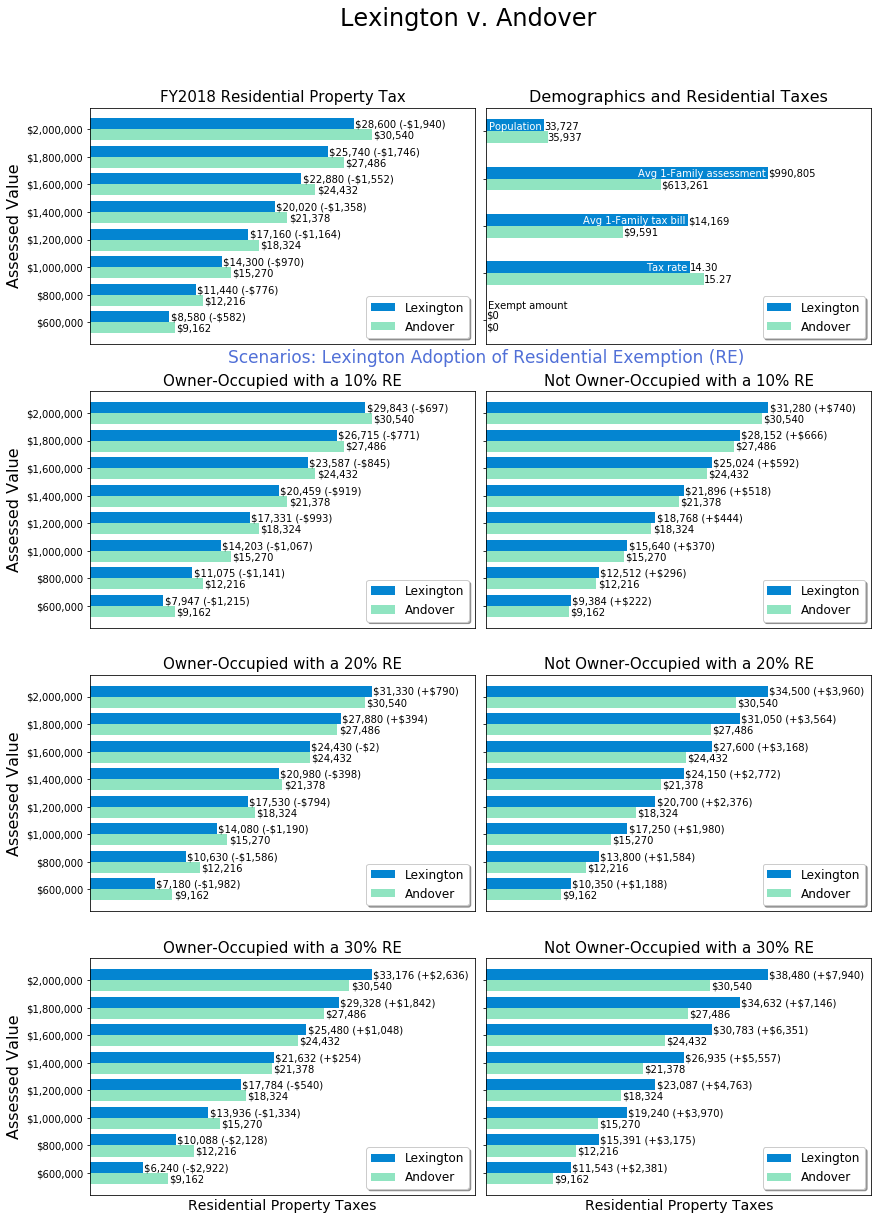

                          Arlington  Lexington
Exempt Amount                   0.0        0.0
Tax Rate                   606500.0   715000.0
Avg Single Family Tax      397850.0   708450.0
Avg Single Family Assess   655985.0   990805.0
Population                 273060.0   202362.0



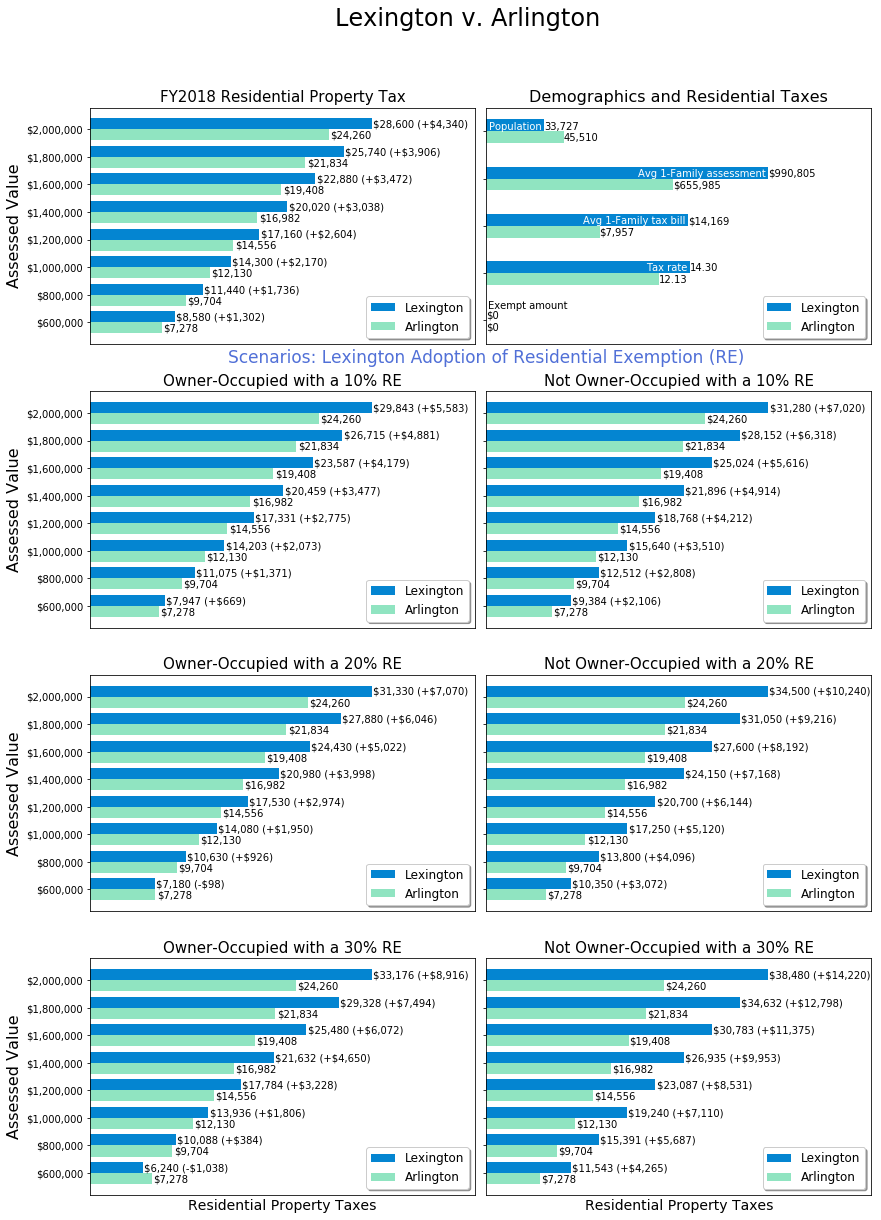

                           Bedford  Lexington
Exempt Amount                  0.0        0.0
Tax Rate                  687000.0   715000.0
Avg Single Family Tax     463250.0   708450.0
Avg Single Family Assess  674276.0   990805.0
Population                 85182.0   202362.0



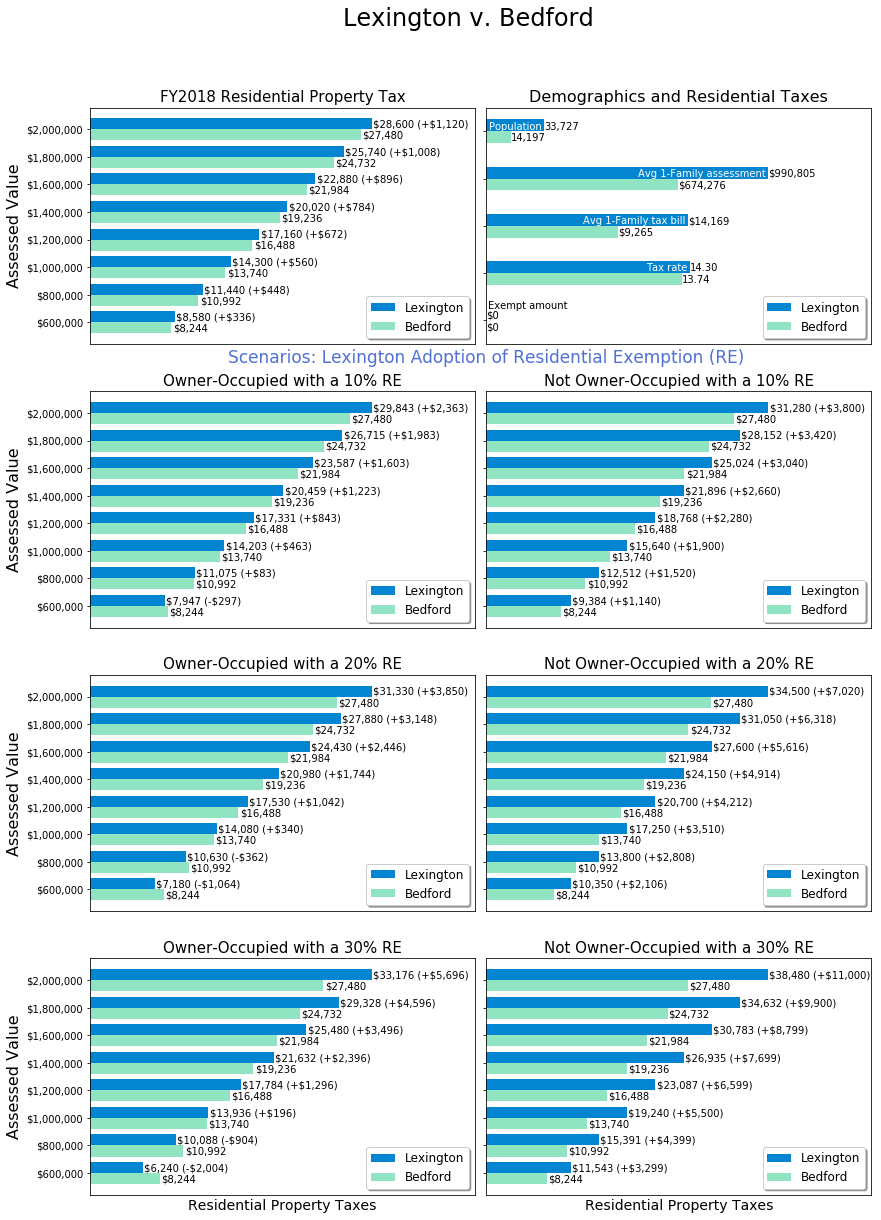

                            Belmont  Lexington
Exempt Amount                   0.0        0.0
Tax Rate                   607500.0   715000.0
Avg Single Family Tax      609800.0   708450.0
Avg Single Family Assess  1003750.0   990805.0
Population                 158748.0   202362.0



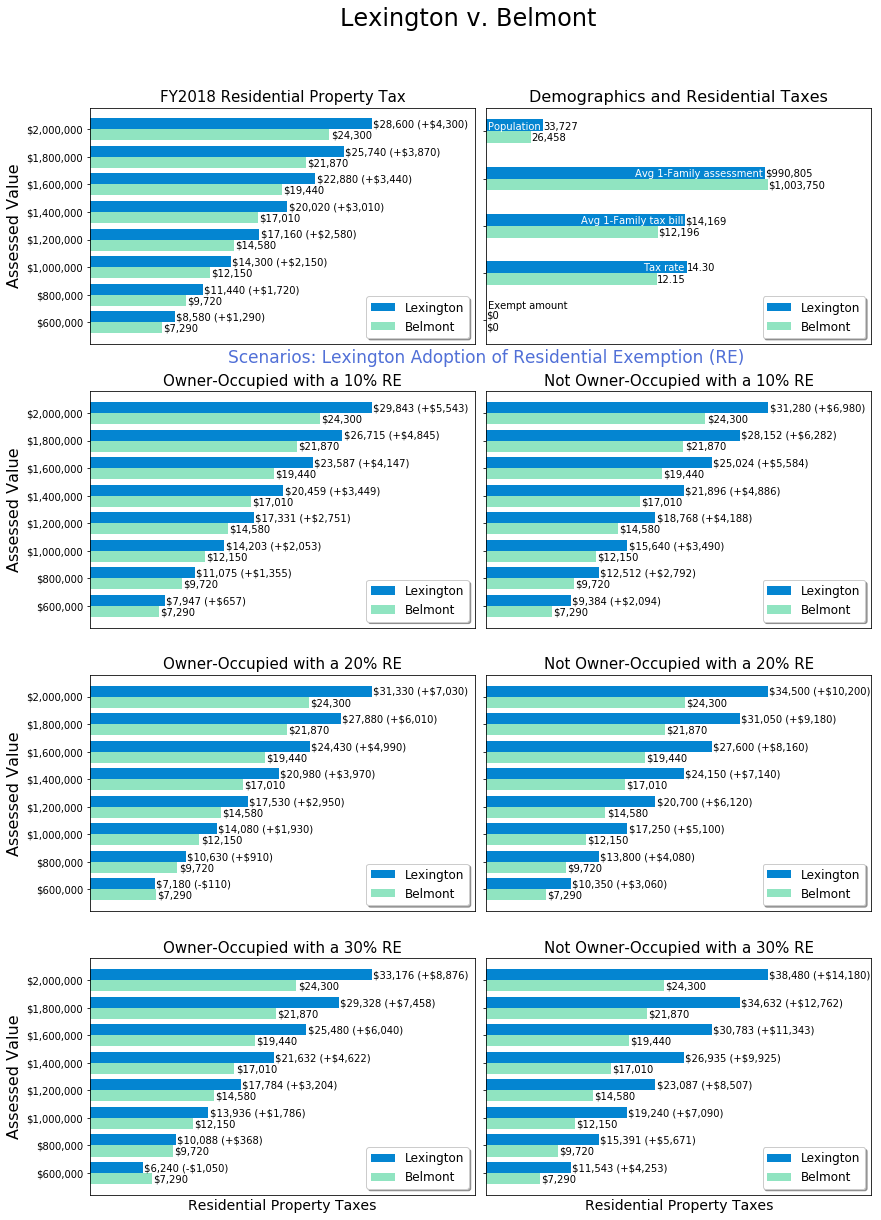

                             Boston  Lexington
Exempt Amount              254969.0        0.0
Tax Rate                   524000.0   715000.0
Avg Single Family Tax      166200.0   708450.0
Avg Single Family Assess        0.0   990805.0
Population                4110564.0   202362.0



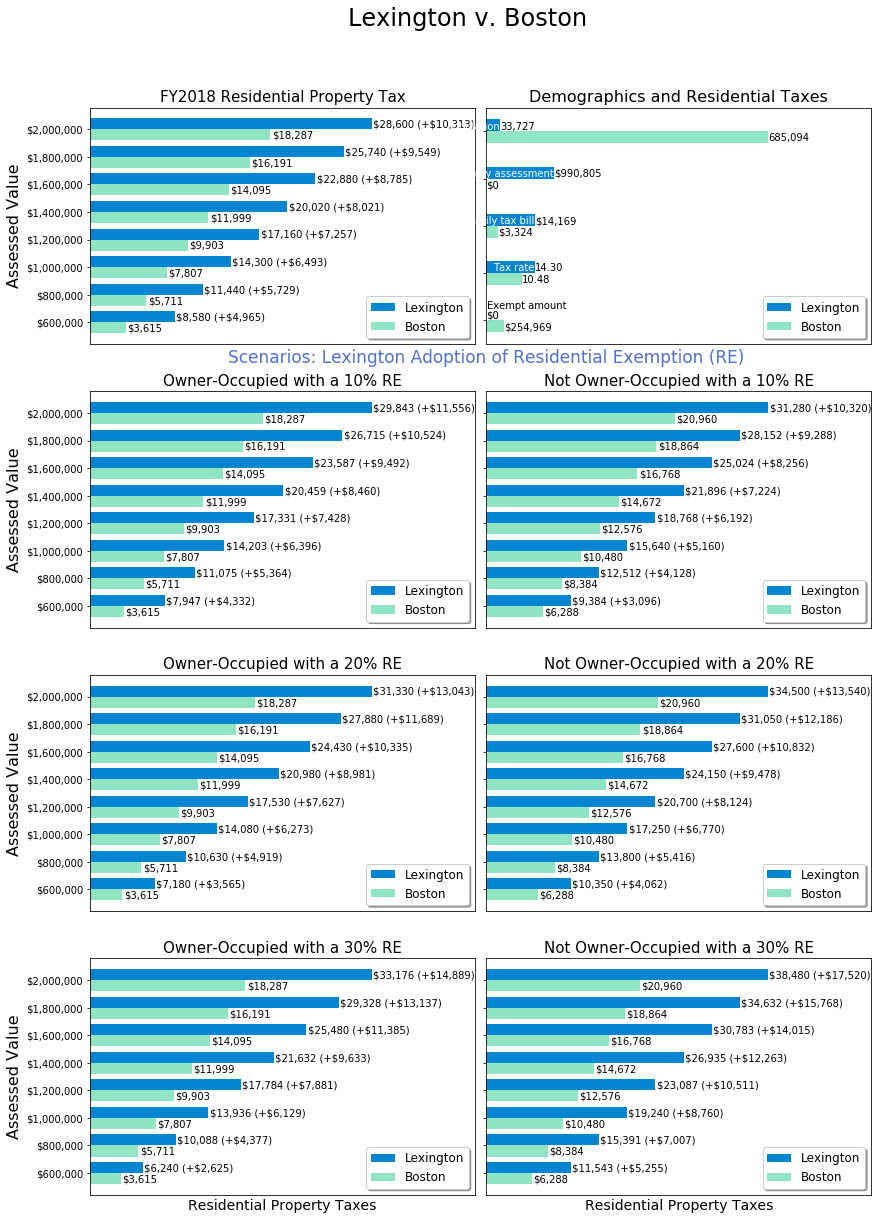

                          Brookline  Lexington
Exempt Amount              246775.0        0.0
Tax Rate                   473000.0   715000.0
Avg Single Family Tax      748150.0   708450.0
Avg Single Family Assess        0.0   990805.0
Population                 354942.0   202362.0



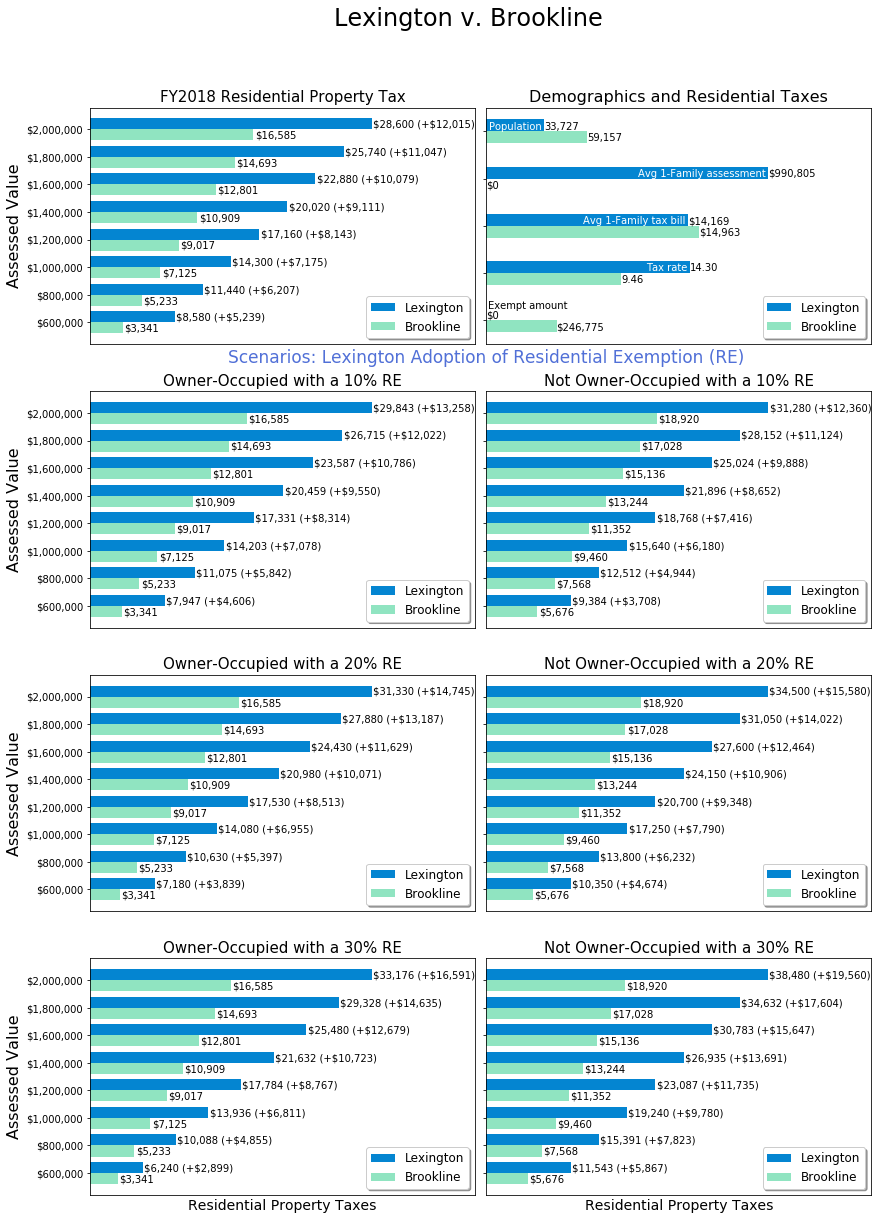

                          Burlington  Lexington
Exempt Amount                    0.0        0.0
Tax Rate                    531000.0   715000.0
Avg Single Family Tax       253550.0   708450.0
Avg Single Family Assess    477504.0   990805.0
Population                  163056.0   202362.0



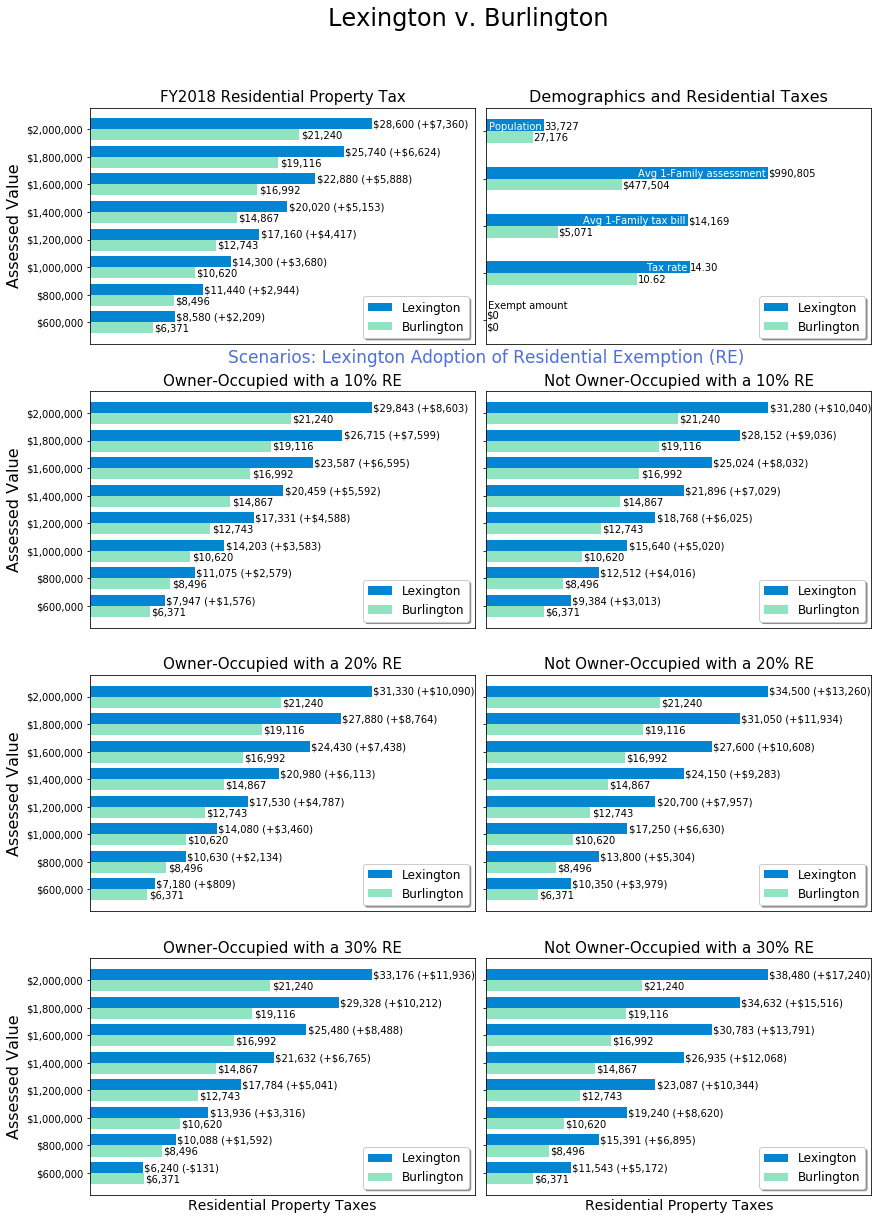

                          Cambridge  Lexington
Exempt Amount              338983.0        0.0
Tax Rate                   314500.0   715000.0
Avg Single Family Tax      360200.0   708450.0
Avg Single Family Assess        0.0   990805.0
Population                 681780.0   202362.0



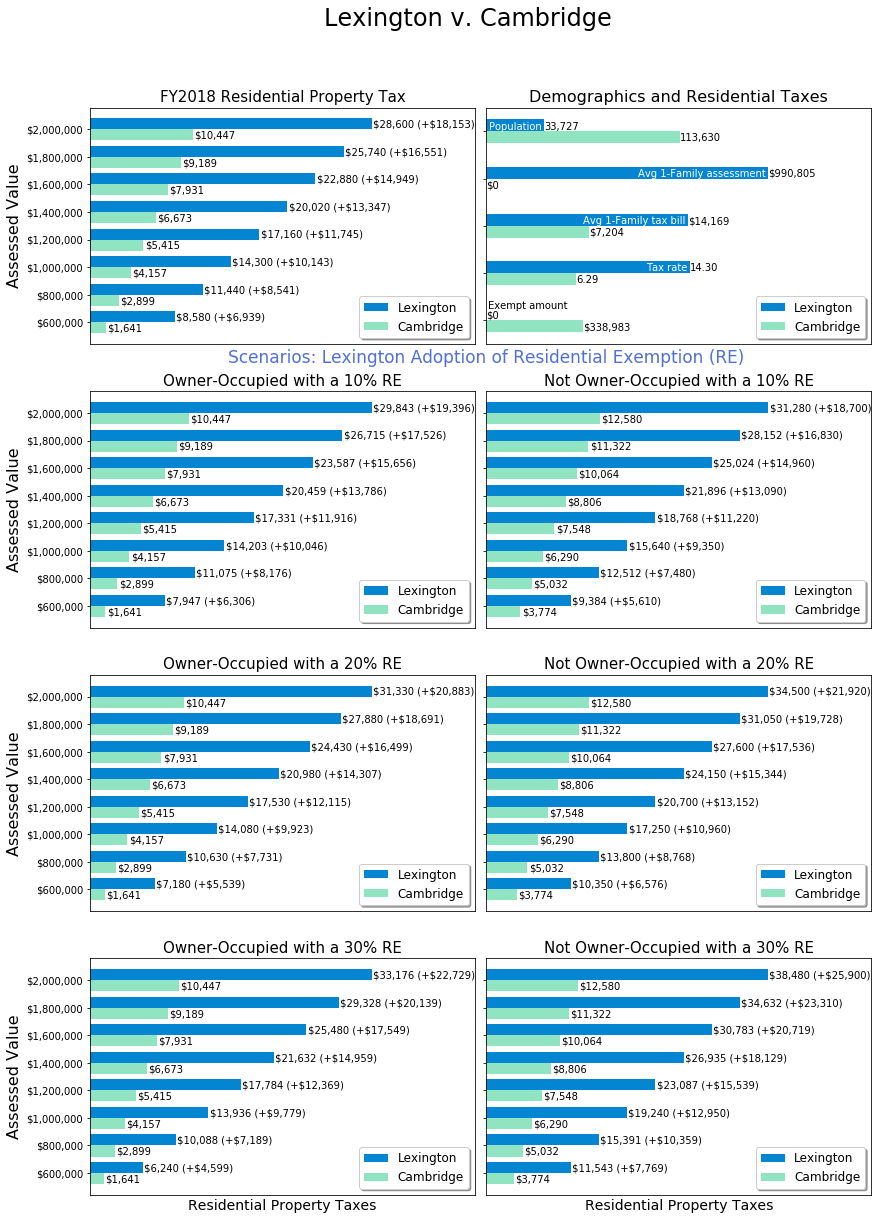

                            Concord  Lexington
Exempt Amount                   0.0        0.0
Tax Rate                   709500.0   715000.0
Avg Single Family Tax      724700.0   708450.0
Avg Single Family Assess  1014269.0   990805.0
Population                 115422.0   202362.0



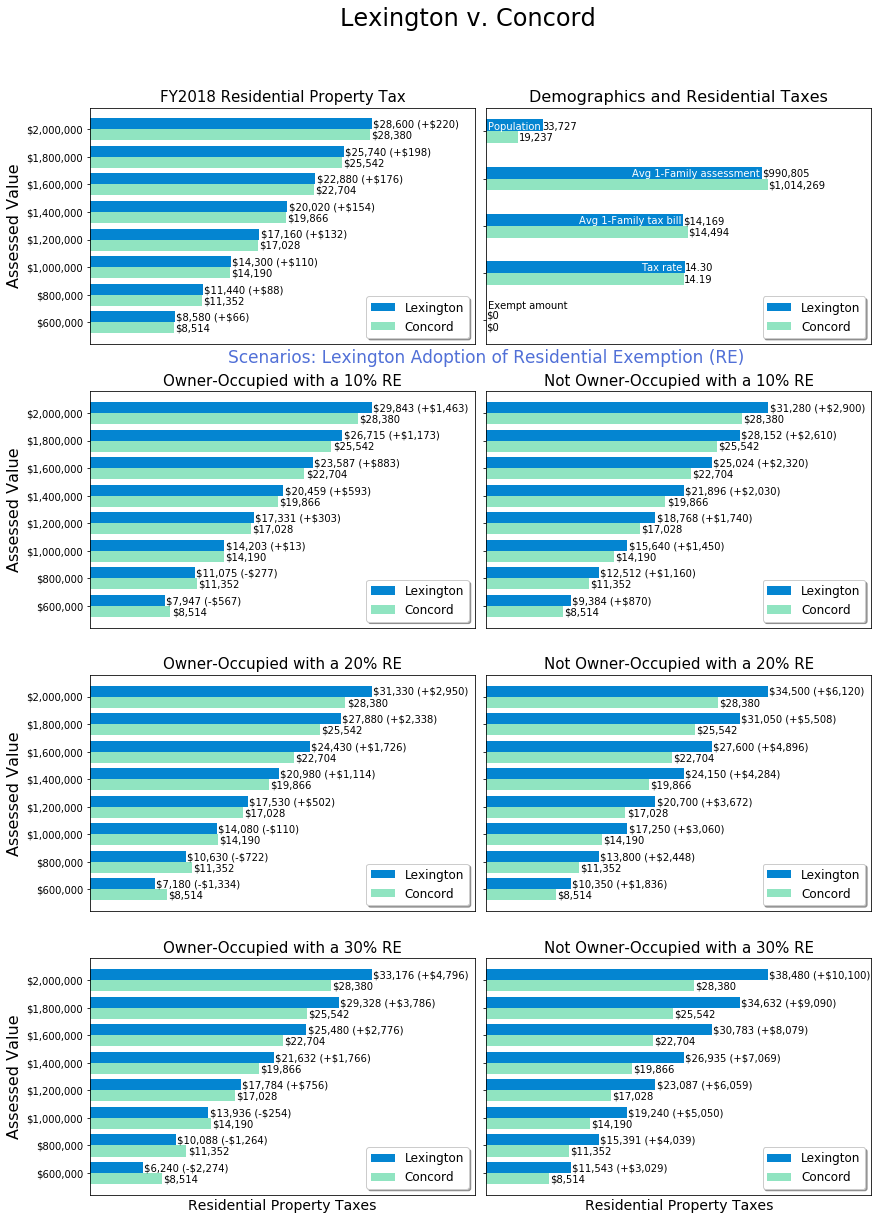

                            Lincoln  Lexington
Exempt Amount                   0.0        0.0
Tax Rate                   701500.0   715000.0
Avg Single Family Tax      781450.0   708450.0
Avg Single Family Assess  1149169.0   990805.0
Population                  40686.0   202362.0



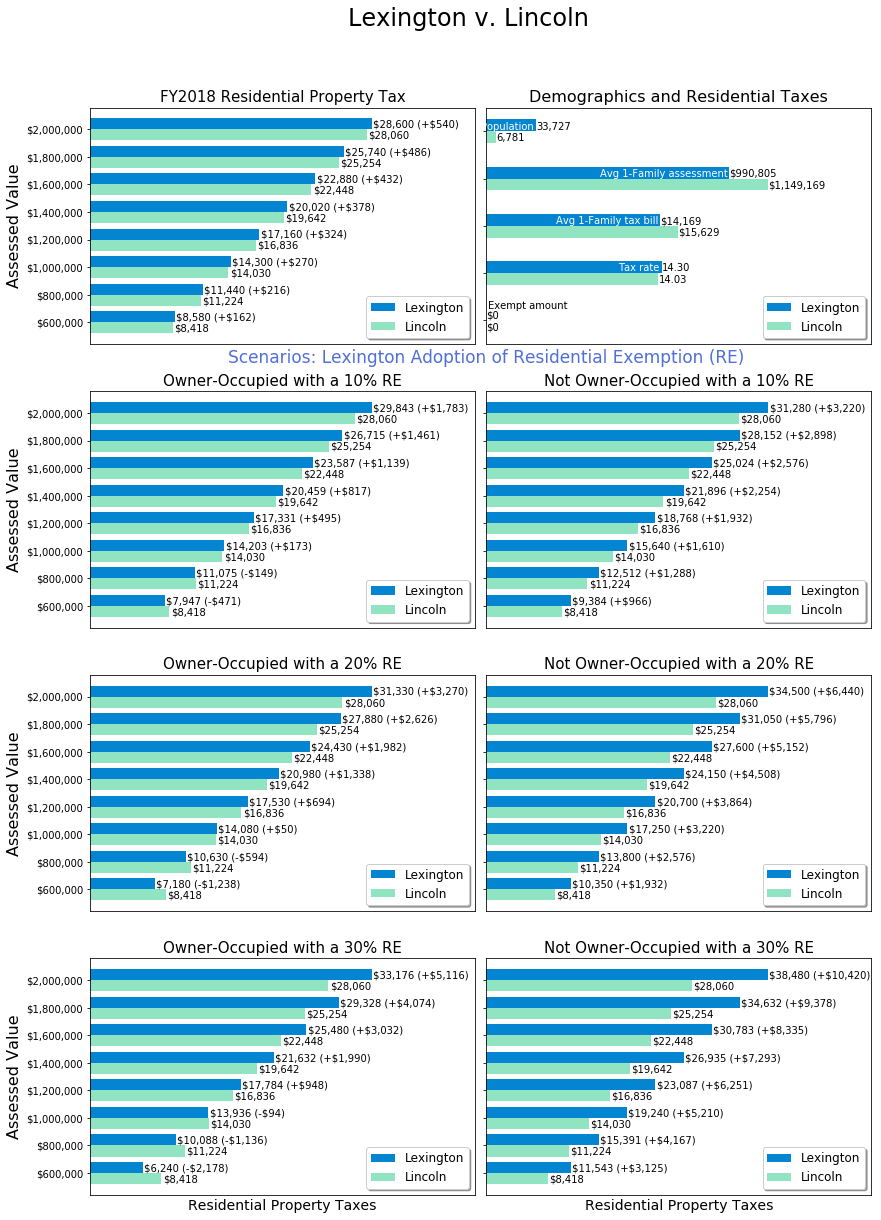

                           Needham  Lexington
Exempt Amount                  0.0        0.0
Tax Rate                  594000.0   715000.0
Avg Single Family Tax     537450.0   708450.0
Avg Single Family Assess  904828.0   990805.0
Population                185994.0   202362.0



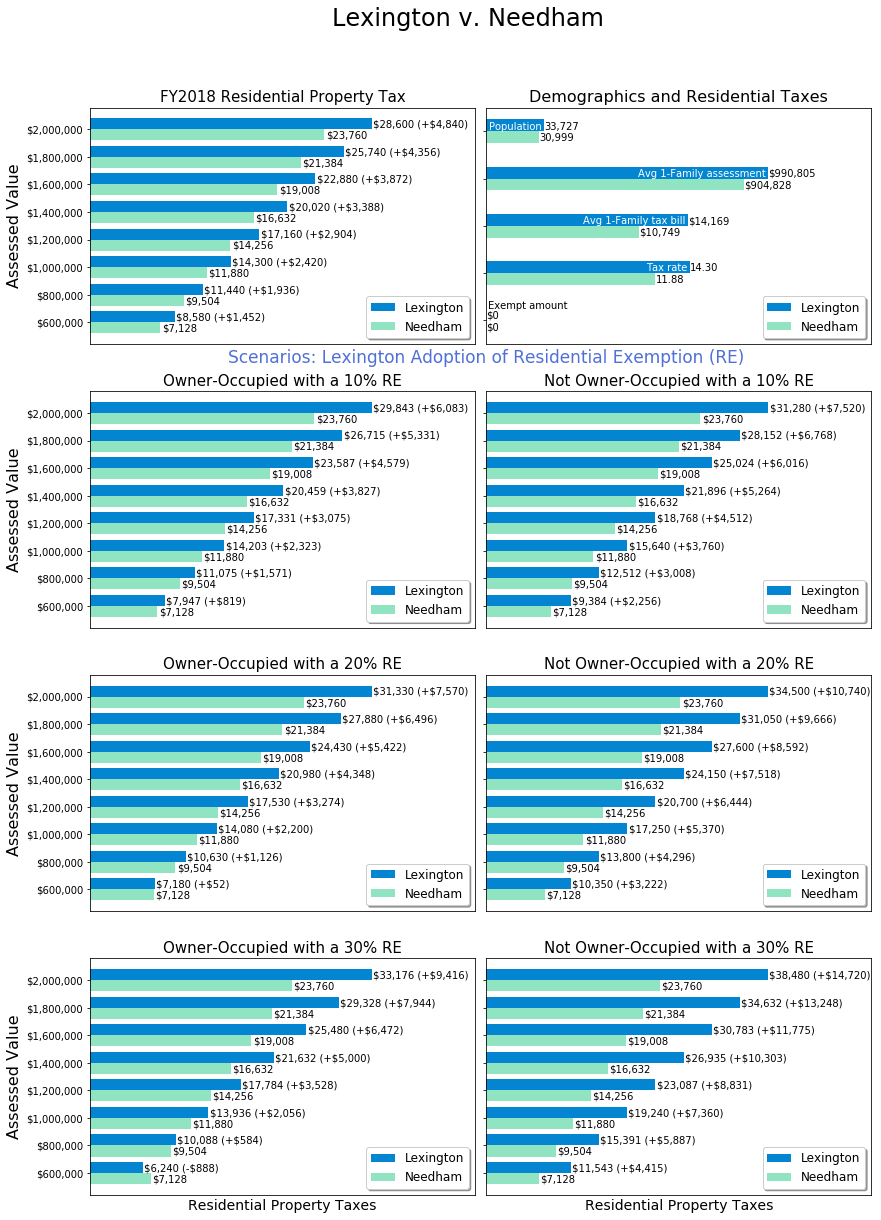

                             Newton  Lexington
Exempt Amount                   0.0        0.0
Tax Rate                   541000.0   715000.0
Avg Single Family Tax      591500.0   708450.0
Avg Single Family Assess  1093367.0   990805.0
Population                 533964.0   202362.0



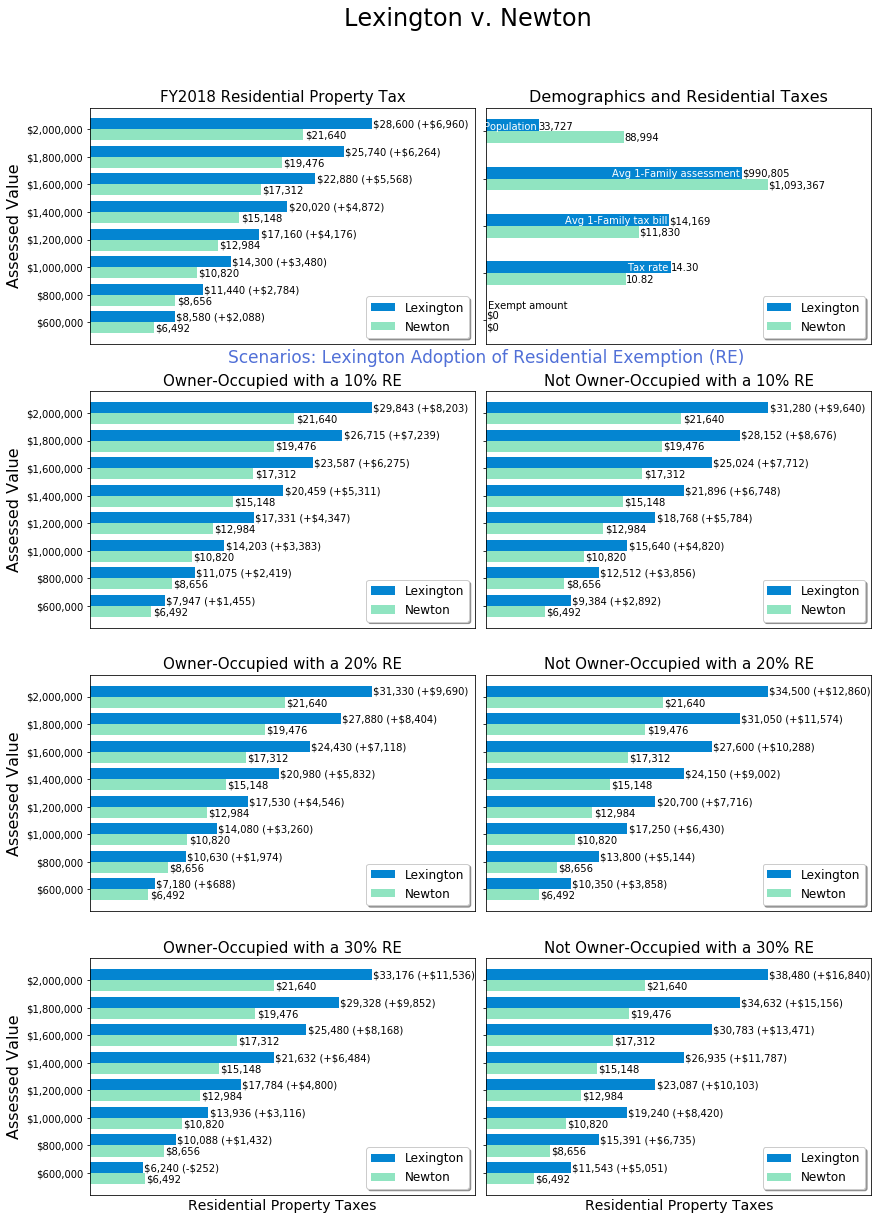

                           Waltham  Lexington
Exempt Amount             147791.0        0.0
Tax Rate                  630500.0   715000.0
Avg Single Family Tax          0.0   708450.0
Avg Single Family Assess       0.0   990805.0
Population                374652.0   202362.0



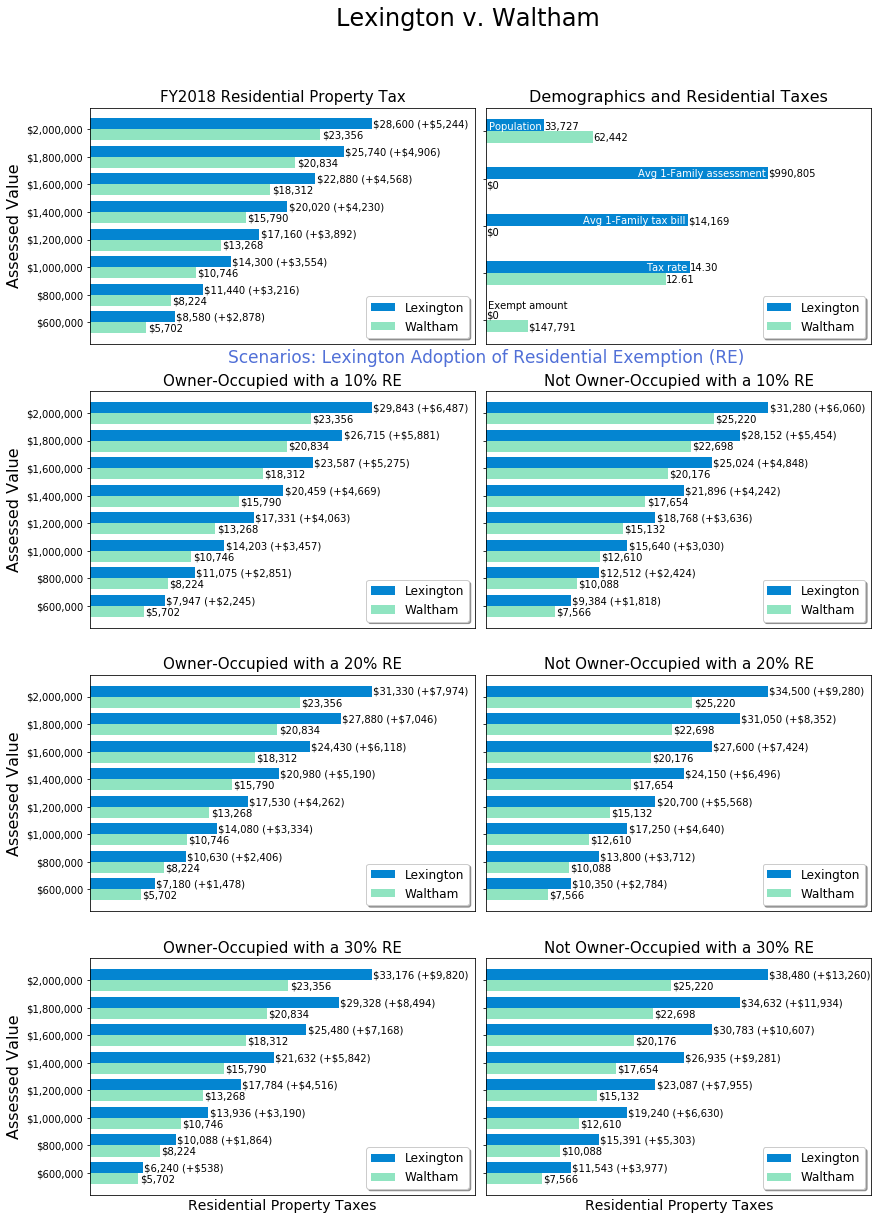

                          Wellesley  Lexington
Exempt Amount                   0.0        0.0
Tax Rate                   597500.0   715000.0
Avg Single Family Tax      741950.0   708450.0
Avg Single Family Assess  1241758.0   990805.0
Population                 176874.0   202362.0



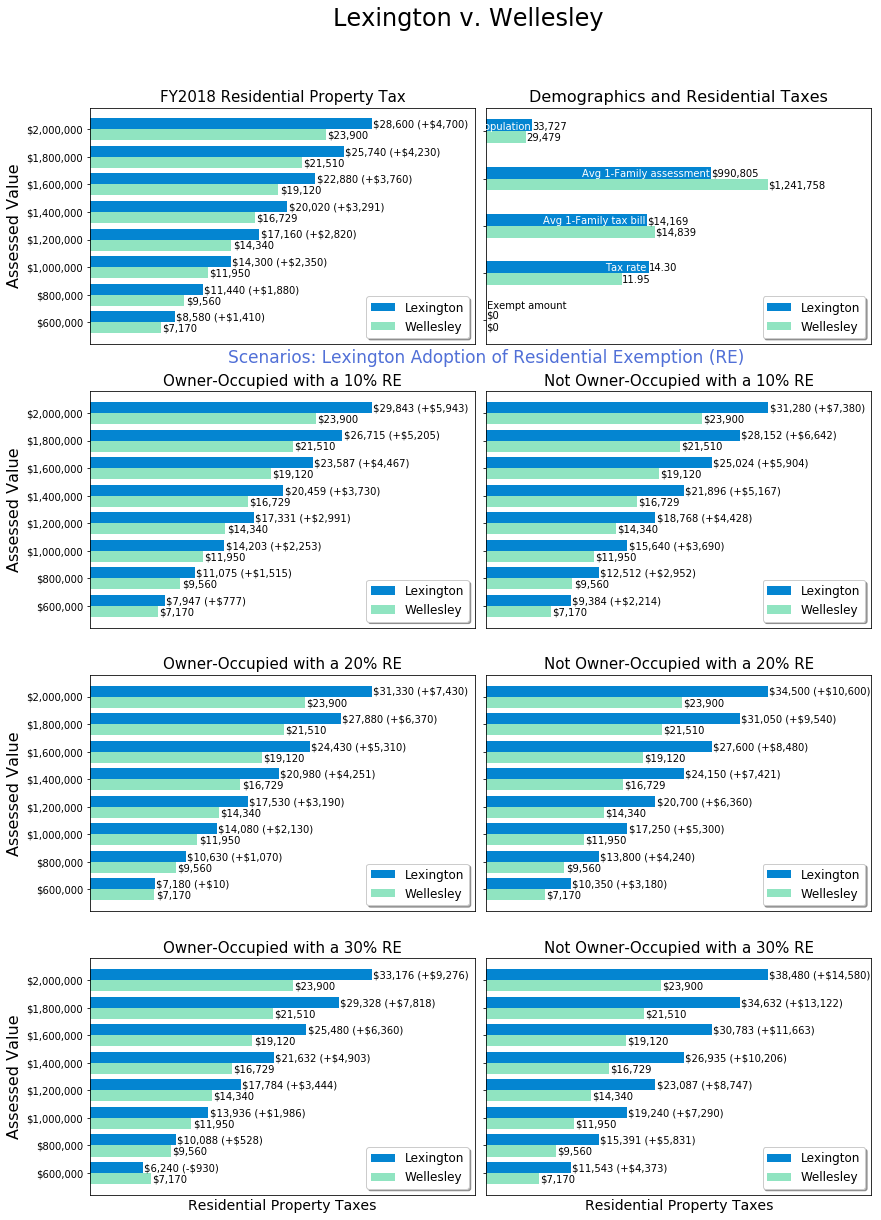

                          Winchester  Lexington
Exempt Amount                    0.0        0.0
Tax Rate                    551000.0   715000.0
Avg Single Family Tax       629500.0   708450.0
Avg Single Family Assess   1032847.0   990805.0
Population                  137028.0   202362.0



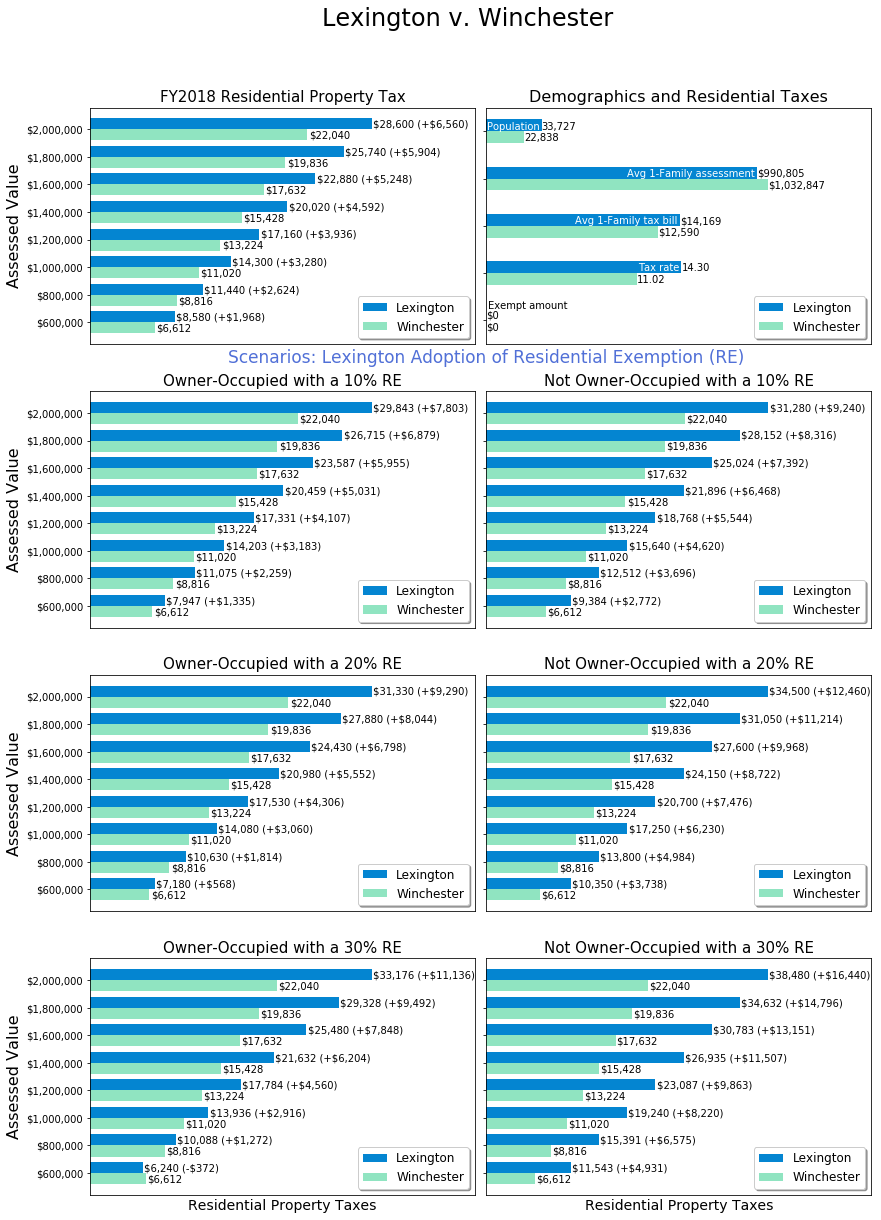

                            Woburn  Lexington
Exempt Amount                  0.0        0.0
Tax Rate                  494500.0   715000.0
Avg Single Family Tax     216100.0   708450.0
Avg Single Family Assess  437002.0   990805.0
Population                238206.0   202362.0



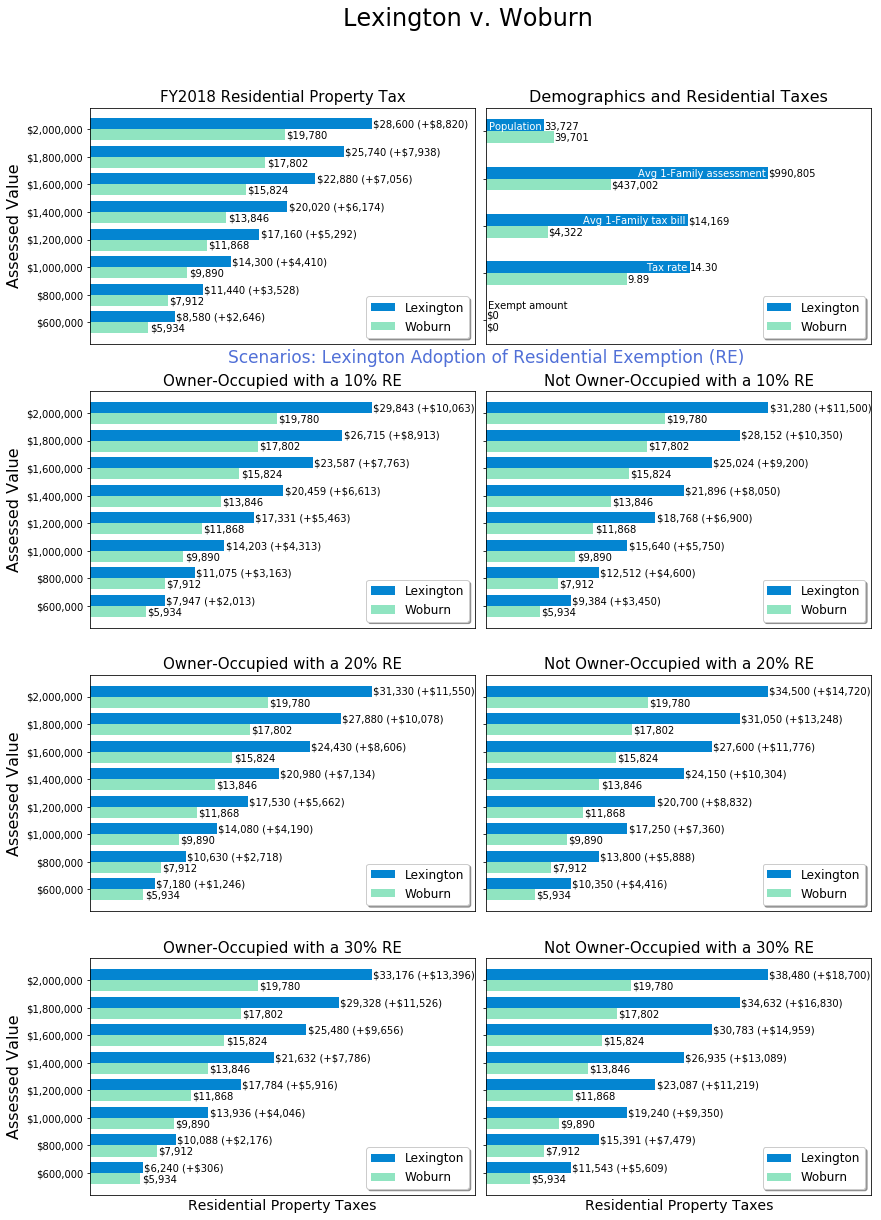

/Users/mark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


                          self  Lexington
Exempt Amount              NaN        0.0
Tax Rate                   NaN   715000.0
Avg Single Family Tax      NaN   708450.0
Avg Single Family Assess   NaN   990805.0
Population                 NaN   202362.0



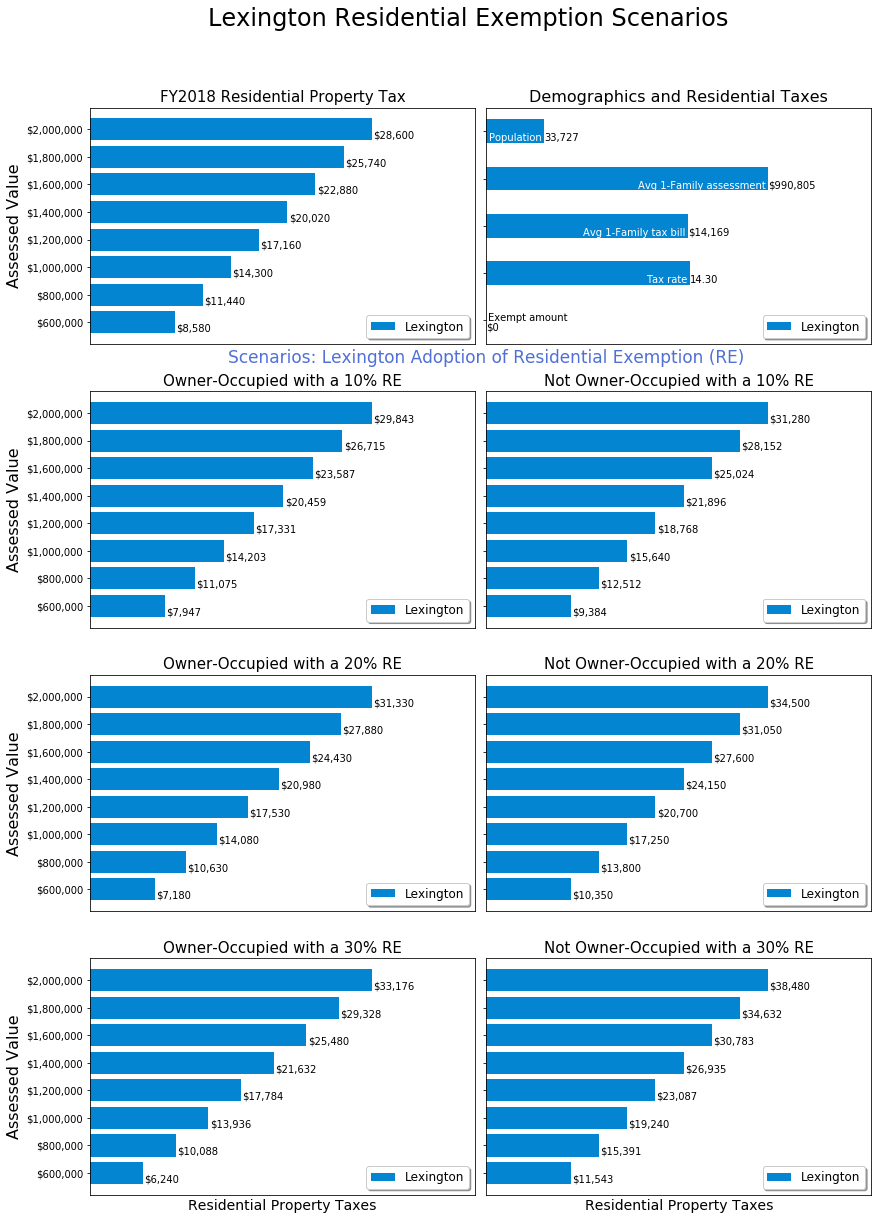

In [41]:
# compare Lexington with all other towns

import numpy as np
def subcategorybar(ax, X, Xlabels, vals, width=0.8, colors=[], labels=[]):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        ax.barh(_X - width/2. + i/float(n)*width, vals[i], 
                height=width/float(n), color=colors[i], align="edge", label=labels[i])  
           

# first color is comparison town
# second is Lexington
colors = ['xkcd:light teal', 'xkcd:cerulean', 'xkcd:red']
self_colors = ['xkcd:cerulean']

barheight = 0.8
town_examples['self'] = []

for i in town_examples:
    if not i.startswith('Lexington'):
        
        #if i not in ['self', 'Belmont']: #['Boston','Brookline','Cambridge','Newton','Waltham']:
        #    print(f'debugging: conversion to python 3, skipping {i}')
        #    continue

        f, axarr = plt.subplots(4, 2)
        f.set_size_inches(14,20)
            
        if i == 'self':
            plt.suptitle('Lexington Residential Exemption Scenarios', y=0.95, fontsize=24)
        else:
            plt.suptitle('%s v. %s' % ('Lexington', i), y=0.95, fontsize=24)
    
        for comparison, sub_title, row, col in \
            [('Lexington', 'FY2018 Residential Property Tax', 0, 0), 
             ('Lexington (10% RE)', 'Owner-Occupied with a 10% RE', 1,0), 
             ('Lexington (20% RE)', 'Owner-Occupied with a 20% RE', 2,0), 
             ('Lexington (30% RE)', 'Owner-Occupied with a 30% RE', 3,0), 
             ('Lexington Nonoo (10% RE)', 'Not Owner-Occupied with a 10% RE', 1,1),
             ('Lexington Nonoo (20% RE)', 'Not Owner-Occupied with a 20% RE', 2,1),
             ('Lexington Nonoo (30% RE)', 'Not Owner-Occupied with a 30% RE', 3,1)]:

            # select examples on each iteration through so we select correct ones for column
            if i == 'self':
                # single town diagram
                i_examples = []
            else:
                # comparison diagram
                if col == 0:
                    # owner occupied
                    i_examples = town_examples[i]
                else:
                    # non-owner occupied
                    i_examples = town_nonoo_examples[i]
                    

            #print 'Drawing r %d c %d' % (row,col)
            ax= axarr[row, col]

            #  use?
            pre_labels = ax.get_yticklabels()
            
            if i == 'self':
                subcategorybar(ax, assessment_levels, assessment_strings,
                           [town_examples[comparison]], colors=self_colors, labels=['Lexington'])
            else:
                subcategorybar(ax, assessment_levels, assessment_strings,
                           [i_examples, town_examples[comparison]], colors=colors, labels=[i, 'Lexington'])
            
            # use?
            pre_labels = ax.get_yticklabels()
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(reversed(handles), reversed(labels), loc='lower right', fontsize='large',
                     fancybox=True, shadow=True)  # reverse both handles and labels        
            ax.set_title(sub_title, fontsize=15)
            if col==0:
                ax.set_ylabel('Assessed Value', fontsize=16)
            if row==3:
                ax.set_xlabel('Residential Property Taxes', fontsize=14)
            
            # enlrage x axis 20% to accomodate annotations of bars
            ax.set_xlim((0, ax.get_xlim()[1]*1.30))
            compare_values = {}
            for patch in ax.patches:
                label = format_thousands_currency(patch.get_width())
                yval = patch.get_y()
                if int(yval) != yval:
                    adj_val = yval + 0.4
                    compare_values[adj_val] = patch.get_width()
                else:
                    #print 'retrieving value', compare_values[yval]
                    label += ' (' + format_thousands_currency(patch.get_width() - compare_values[yval], add_plus=True) + ')'
                ax.text(patch.get_x() + patch.get_width() + 150, 
                        patch.get_y(), 
                        label,
                       ha='left', 
                       va='bottom')

        # demographic comparison
        #
        # we will need y axis labels for demographics 
        ax = axarr[0,1]
        
        # In Python2: seemed to pass in 0.5 and 0.7 as it was for whole plot
        # But with upgrade to Python3, these coordinates seem relative to upper right chart
        plt.figtext(0.0, -0.02, 'Scenarios: Lexington Adoption of Residential Exemption (RE)', 
            transform=ax.transAxes, fontsize=17, color = 'xkcd:cornflower blue', ha='center', va='top')   

        # labels for chart
        tempdf = tdf.loc[[i, 'Lexington'],['ResExemption', 'ResRate', 'AvgSingleFamilyTax', 'AvgSingleFamilyValue', 'Population']
                         ]
        
        resrate_mult = 50000.0
        tempdf.ResRate *= resrate_mult
        pop_mult = 6.0
        tempdf.Population *= pop_mult
        tax_mult = 50.0
        tempdf.AvgSingleFamilyTax *= tax_mult
        tempdf.rename(columns={'ResRate':'Tax Rate', 
                               'ResExemption':'Exempt Amount',
                               'AvgSingleFamilyValue':'Avg Single Family Assess',
                               'AvgSingleFamilyTax': 'Avg Single Family Tax'
                              },
                     inplace=True)
        tempdf = tempdf.transpose()
        
        print(tempdf)
        if i == 'self':
            tempdf.plot.barh(y=['Lexington'], ax=ax, legend=True, color=self_colors) 
        else:
            tempdf.plot.barh(y=[i, 'Lexington'], ax=ax, legend=True, color=colors) 
#        ax.legend(labels=[i,'Lexington'],loc='lower right', fontsize='large', fancybox=True, shadow=True)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(reversed(handles), reversed(labels), loc='lower right', fontsize='large',
                     fancybox=True, shadow=True)  # reverse both handles and labels        
        labels = {
            0:'Exempt amount',
            1:'Tax rate',
            2:'Avg 1-Family tax bill',
            3:'Avg 1-Family assessment',
            4:'Population'
        }
        
        ax.set_xlim((0, ax.get_xlim()[1]*1.30))
        for cntr, patch in enumerate(ax.patches):
            patch_type = cntr % 5
            if patch_type in [0,3]:  # exempt amount, avg single family tax, avg single family assess
                label = format_thousands_currency(patch.get_width())
            elif patch_type == 2:
                label = format_thousands_currency(patch.get_width() / tax_mult)
            elif patch_type == 1:
                label = '%1.2f' % (patch.get_width()/resrate_mult)
                #print 'residential tax rate label %s' % label
            else:
                label = format_thousands_currency(int(patch.get_width() / pop_mult), add_plus=False, add_currency=False)
            #print '%d annotation with label %s' % (cntr, label)
            ax.text(patch.get_x() + patch.get_width() + 150, 
                        patch.get_y(),
                        label, 
                        ha='left', 
                        va='bottom')   
            if i=='self' or cntr > 4:
                if (cntr%5) == 0:
                    ax.text(patch.get_x() + patch.get_width()+5000, 
                                patch.get_y()+0.2,
                                labels[cntr%5], 
                                color = 'xkcd:black',
                                ha='left', va='bottom')
                else:
                    ax.text(patch.get_x() + patch.get_width()-8000, 
                                patch.get_y(), #+0.2,
                                labels[cntr%5], 
                                color = 'xkcd:white',
                                ha='right', 
                                va='bottom')   
                
        ax.set_title('Demographics and Residential Taxes', fontsize=16)

        
        # Average single family tax bill  
        # 
        # just two color bars - one per town so this can go in lower right
        if 1==0:
            ax = axarr[2,1]
            tdf.loc[[i, 'Lexington']].plot.barh(y='AvgSingleFamilyTax',ax=ax, color=colors, legend=False)        
            ax.set_xlim((0, ax.get_xlim()[1]*1.30))
            for patch in ax.patches:
                label = format_thousands_currency(int(patch.get_width()))
                #print 'annotation with label %s' % label
                ax.text(patch.get_x() + patch.get_width() + 150, 
                            patch.get_y()+.1,
                            label, 
                            ha='left', 
                            va='bottom')        
            ax.set_title('Average Single Family Tax Bill (FY2018)', fontsize=16)
           # ax.legend(labels=[i,'Lexington'],loc='lower right', fontsize='large', fancybox=True, shadow=True)
 
                

        
        # no x tick labels
        plt.setp([a.xaxis.set_major_locator(plt.NullLocator()) for a in axarr.flatten()])
                  
        # must set yticks and yticklabels
        plt.setp([a.set_yticks(np.arange(len(assessment_strings))) for a in axarr[:,0]], visible=True)
        plt.setp([a.set_yticklabels(assessment_strings) for a in axarr[:,0]], visible=True)
        # y tick labels only for rows
        
        plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
        
        plt.subplots_adjust(wspace=0.03)
        f.savefig('prop_tax_compare_%s.png' % i)
        plt.show()
        

        
# need three bars - also non owner occupied property in lexington
# relative to base community!
# that's going to be a lot higher
#

## Non-Owner Occupied % Increase Illustration

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8 entries, 0.0 to 0.35
Data columns (total 1 columns):
tax_increase    8 non-null float64
dtypes: float64(1)
memory usage: 128.0 bytes
None
      tax_increase
0.00         0.000
0.05         0.045
0.10         0.093
0.15         0.147
0.20         0.206
0.25         0.272
0.30         0.345
0.35         0.426
<a list of 8 Text yticklabel objects>


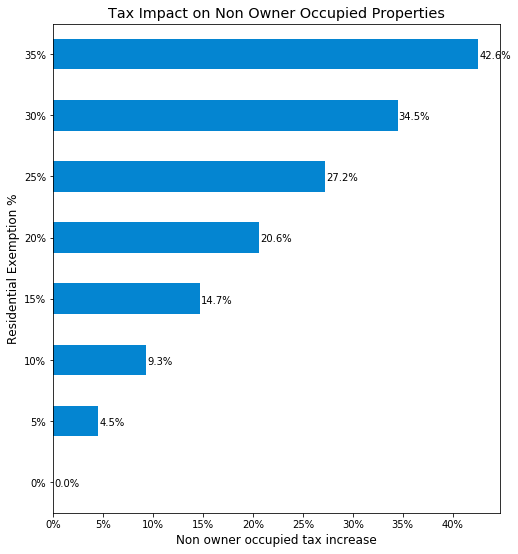

In [89]:


tax_increase = {
    0:0,
    .05:.045,
    .10:.093,
    .15:.147,
    .20:.206,
    .25:.272,
    .30:.345,
    .35:.426
}

taxser = pd.Series(tax_increase)
taxdf = taxser.to_frame(name='tax_increase')
print(taxdf.info())
print(taxdf)
taxdf.plot.barh(y='tax_increase', color='xkcd:cerulean', legend=None, figsize=(8,9))
ax = plt.gca()
prelabels = ax.get_yticklabels()
print(prelabels)
ax.set_yticklabels(['0%','5%','10%','15%','20%','25%','30%','35%'])
ax.set_xticklabels(['0%','5%','10%','15%','20%','25%','30%','35%','40%'])
#ax.legend(labels=[])
plt.ylabel('Residential Exemption %', fontsize='large')
plt.xlabel('Non owner occupied tax increase', fontsize='large')
plt.title('Tax Impact on Non Owner Occupied Properties', fontsize='x-large')

for cntr, patch in enumerate(ax.patches):
    label = '%2.1f%%' % (100.0*patch.get_width())
    ax.text(patch.get_x() + patch.get_width()+.001, patch.get_y()+.23, 
        label,
        ha='left', 
        va='center')
f = plt.gcf()
f.savefig('non_owner_occupied.png')
plt.show()

<h2>Code Samples Below</h2>

In [28]:
raise "do not run code samples in straight through run"

TypeError: exceptions must derive from BaseException

3.0.2


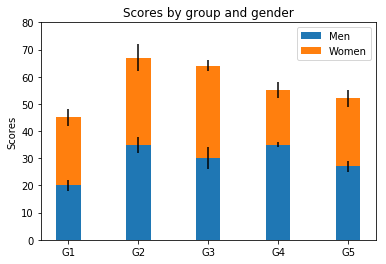

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)


N = 5
menMeans = [20, 35, 30, 35, 27]
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

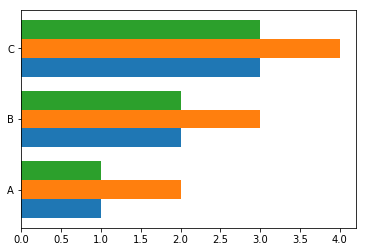

In [57]:
# example code: https://stackoverflow.com/questions/48157735/plot-multiple-bars-for-categorical-data
# tweaked for horizontal bar charts
import numpy as np
import matplotlib.pyplot as plt

X = ['A','B','C']
Y = [1,2,3]
Z = [2,3,4]

def subcategorybar(ax, X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        pre_labels = ax.get_yticklabels()

#        print 'Pre: Length of labels', len(pre_labels)
#        for cntr, k in enumerate(pre_labels):
#            print cntr, k.get_text()
#        print 'about to plot vals with length %d' % len(vals[i])
#        print vals[i]
        ax.barh(_X - width/2. + i/float(n)*width, vals[i], 
                height=width/float(n), align="edge")   
#        pre_labels = ax.get_yticklabels()
#        print 'Post: Length of labels', len(pre_labels)
#        for cntr, k in enumerate(pre_labels):
#            print cntr, k.get_text()

    ax.set_yticks(_X)
    ax.set_yticklabels(X)
#    plt.yticks(_X, X)

ax = plt.gca()
subcategorybar(ax, X, [Y,Z,Y])

plt.show()

In [ ]:
a=[2,4,6,80]
b=[5,12,20,50]

plt.barh(a,b)
plt.show()

# lesson:
# must set axis to string to have matplotlib not try to proportionally space
# as in a categorical variable

a=['2','4','6','80']
b=[5,12,20,50]

plt.barh(a,b)
plt.show()

<h2>Sample Code</h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (db)')
plt.show()